### Import and configure packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline

import seaborn as sns
import holoviews as hv
import hvplot.pandas
import panel as pn
pn.extension()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


### Load data

In [2]:
from bokeh.sampledata.autompg import autompg_clean as auto_df

In [3]:
auto_df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mfr
0,18.0,8,307.0,130,3504,12.0,70,North America,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,North America,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,North America,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,North America,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,North America,ford torino,ford


### Interactive plots

Scatter plot with ``weight`` as xaxis and ``mpg`` as yaxis

<AxesSubplot:xlabel='weight', ylabel='mpg'>

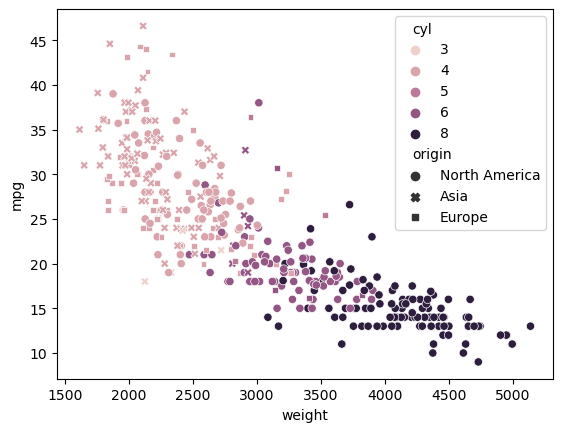

In [4]:
sns.scatterplot(data=auto_df, x="weight", y="mpg", hue="cyl",style='origin')

Use .hvplot to generate interactive scatter plot

In [8]:
auto_df.hvplot("weight", "mpg", kind="scatter", hover_cols = ['yr', 'name'])

#  hover_cols specify the columns yoy want when you put your mouse on it

:Scatter   [weight]   (mpg,yr,name)

Give different colors to the data points in the scatter plot based on a variable

In [10]:
auto_df.hvplot("weight", "mpg", kind="scatter", by="cyl")

:NdOverlay   [cyl]
   :Scatter   [weight]   (mpg)

### Overlay plots with hvplot
combine plots into an overlay using the * symbol
For example, to create an equivalent for ``auto_df.hvplot.scatter(x='weight', y='mpg', by='origin')``

In [11]:
( 
    auto_df[auto_df.origin=='Asia'].hvplot.scatter(x='weight', y='mpg', by='origin') * 
    auto_df[auto_df.origin=='Europe'].hvplot.scatter(x='weight', y='mpg', by='origin') * 
    auto_df[auto_df.origin=='North America'].hvplot.scatter(x='weight', y='mpg', by='origin') 
)

:Overlay
   .NdOverlay.I   :NdOverlay   [origin]
      :Scatter   [weight]   (mpg)
   .NdOverlay.II  :NdOverlay   [origin]
      :Scatter   [weight]   (mpg)
   .NdOverlay.III :NdOverlay   [origin]
      :Scatter   [weight]   (mpg)

Create a kde plot of mpg overlaid on a histogram of mpg.  

In [35]:
auto_df.hvplot.kde('mpg', line_width=2, label='hvplot KDE'
                  )* auto_df['mpg'].hvplot.hist(label='Histogram', bins=20, alpha=0.5, normed = True)

:Overlay
   .Distribution.Hvplot_KDE :Distribution   [mpg]   (Density)
   .Histogram.I             :Histogram   [mpg]   (mpg_frequency)

### Interactive dashboard

Use panel and hvplot to build interactive dashboard

#### Set up

In [36]:
def environment():
    try:
        get_ipython()
        print('notebook')
        return str(get_ipython())
    except:
        print('server')
        return 'server'

env = environment()

if env=="server":
   theme="fast"
else:
   theme="simple"

# if 'google.colab' in env:
#     print('Running on CoLab')
#     !pip install panel hvplot

notebook


In [37]:
pn.extension('tabulator', sizing_mode="stretch_width")
hv.extension('bokeh')

Pipeline in Pandas

Check the average horsepower for each ``origin``, ``year``, and ``miles per gallon``, for all automobiles with ``# of cylinder = 4`` and manufactured by ``ford``, ``honda``, or ``chevrolet``



In [70]:
(
    auto_df[
        (auto_df.cyl == 4) & 
        (auto_df.mfr.isin(['ford','chevrolet', 'honda']))
    ]
    .groupby(['origin', 'cyl', 'mfr', 'mpg','yr'])['hp'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by=['mpg'])
)#.head(1)

,origin,cyl,mfr,mpg,yr,hp
28,North America,4,ford,19.0,73,85.0
13,North America,4,chevrolet,20.0,72,90.0
14,North America,4,chevrolet,21.0,73,72.0
29,North America,4,ford,21.0,72,86.0
15,North America,4,chevrolet,22.0,71,72.0
30,North America,4,ford,22.0,72,86.0
31,North America,4,ford,22.3,79,88.0
32,North America,4,ford,23.0,75,83.0
33,North America,4,ford,24.0,82,92.0
0,Asia,4,honda,24.0,74,97.0


#### Generate interactive dashboard
1: get interactive dataframe

2: define ``panel widgets``

3: replace the pandas pipeline elements with ``panel widgets``

In [71]:
### Step 1: get interactive dataframe
idf = auto_df.interactive()

In [72]:
### Step 2: define ``panel`` widget
cylinders = pn.widgets.IntSlider(name='Cylinders', start=4, end=8, step=2)
cylinders

IntSlider(end=8, name='Cylinders', sizing_mode='stretch_width', start=4, step=2, value=4)

In [73]:
###         toggle group: afford multiple choices
manufacturer = pn.widgets.ToggleGroup(
    name='MFR',
     options=['ford', 'chevrolet', 'honda'], 
    value=['ford', 'chevrolet', 'honda'],
#     options=['ford', 'chevrolet', 'honda', 'toyota', 'audi'], 
#     value=['ford', 'chevrolet', 'honda', 'toyota', 'audi'],
    button_type='success')
manufacturer

CheckButtonGroup(button_type='success', name='MFR', options=['ford', 'chevrolet', ...], sizing_mode='stretch_width', value=['ford', 'chevrolet', ...])

In [75]:
## can only choose one value

yaxis = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=['hp', 'weight'],
    button_type='success'
)
yaxis


# RadioButtonGroup v.s. toggle: RadioButtonGroup can only choose one 

RadioButtonGroup(button_type='success', name='Y axis', options=['hp', 'weight'], sizing_mode='stretch_width', value='hp')

In [77]:
### Step 3
'''
(
    auto_df[
        (auto_df.cyl == 4) & 
        (auto_df.mfr.isin(['ford','chevrolet', 'honda']))
    ]
    .groupby(['origin', 'cyl', 'mfr', 'mpg','yr'])['hp'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by=['mpg'])
)
'''
ipipeline = (
    idf[
        (idf.cyl == cylinders) & 
        (idf.mfr.isin(manufacturer))
    ]
    .groupby(['origin', 'mpg', 'yr', 'cyl', 'mfr' ])[yaxis].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='mpg')  
    .reset_index(drop=True)
)
ipipeline.head(20)

"\n(\n    auto_df[\n        (auto_df.cyl == 4) & \n        (auto_df.mfr.isin(['ford','chevrolet', 'honda']))\n    ]\n    .groupby(['origin', 'cyl', 'mfr', 'mpg','yr'])['hp'].mean()\n    .to_frame()\n    .reset_index()\n    .sort_values(by=['mpg'])\n)\n"

You can also pipe the interactive dashboard to plot

In [78]:
PALETTE = ["#ff6f69", "#ffcc5c", "#88d8b0"]
ihvplot = ipipeline.hvplot(x='mpg', y=yaxis, by='origin', color=PALETTE, line_width=6, height=400)
ihvplot

Pipe to table

In [79]:
itable = ipipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size=10, theme=theme)
itable

#### Customize layout

In [86]:
pn.Column(pn.Row(cylinders, manufacturer, yaxis), ihvplot.panel(), itable.panel())

Column(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] IntSlider(end=8, name='Cylinders', sizing_mode='stretch_width', start=4, step=2, value=6)
        [1] CheckButtonGroup(button_type='success', name='MFR', options=['ford', 'chevrolet', ...], sizing_mode='stretch_width', value=['ford', 'chevrolet', ...])
        [2] RadioButtonGroup(button_type='success', name='Y axis', options=['hp', 'weight'], sizing_mode='stretch_width', value='weight')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False, sizing_mode='stretch_width')
    [2] ParamFunction(function, _pane=Tabulator, defer_load=False, sizing_mode='stretch_width')

In [84]:
PALETTE = ['#30a2da']
ihvplot = ipipeline.hvplot(x='mpg', y=yaxis, by='origin', color=PALETTE, line_width=2, height=300)
ihvplot

### Serve the dashboard

Step 1. make it servable

In [87]:

dashboard = pn.Column(
    pn.Row(
        cylinders, manufacturer, yaxis
    ),
    ihvplot.panel(),
    itable.panel()
)
dashboard.servable()

Column(sizing_mode='stretch_width')
    [0] Row(sizing_mode='stretch_width')
        [0] IntSlider(end=8, name='Cylinders', sizing_mode='stretch_width', start=4, step=2, value=6)
        [1] CheckButtonGroup(button_type='success', name='MFR', options=['ford', 'chevrolet', ...], sizing_mode='stretch_width', value=['ford', 'chevrolet', ...])
        [2] RadioButtonGroup(button_type='success', name='Y axis', options=['hp', 'weight'], sizing_mode='stretch_width', value='weight')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False, sizing_mode='stretch_width')
    [2] ParamFunction(function, _pane=Tabulator, defer_load=False, sizing_mode='stretch_width')